# ***IMPORT LIBRARY***

In [ ]:
import pandas as pd
import math
import numpy as np
import gdown

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from sklearn.metrics import mean_absolute_error, mean_squared_error

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# ***DATASET***

## ***Dataset* Film**

In [ ]:
'''https://drive.google.com/file/d/17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl/view?usp=sharing'''

id = "17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl"
gdown.download(id=id, output="imdb.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl
To: /content/imdb.csv
100%|██████████| 1.54M/1.54M [00:00<00:00, 14.1MB/s]


'imdb.csv'

In [ ]:
df_film = pd.read_csv("imdb.csv")
df_film.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)
df_film

,type,name,url,poster,description,review,IMDB,contentRating,genre,datePublished,keywords,duration,actor,director,creator,RottenTomatoes Audience Score,RottenTomatoes Tomato Meter
0,Movie,14 Cameras,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMTk4OD...,When a family of five rent a beautiful house f...,"{'author': 'aprilsfriendorin', 'dateCreated': ...",2.30,TV-MA,"['Crime', 'Horror', 'Thriller']",2018-07-27,"tied feet,tied up while barefoot,tape over mou...",PT1H30M,"[{'name': 'Zach Dulin', 'url': 'https://www.im...","[{'name': 'Seth Fuller', 'url': 'https://www.i...","[{'name': 'Victor Zarcoff', 'url': 'https://ww...",1.10,1.10
1,Movie,17 Again,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMjA2NT...,0,"{'author': 'tavm', 'dateCreated': '2009-04-21'...",3.20,PG-13,"['Comedy', 'Drama', 'Fantasy']",2009-04-17,"body transformation,adult as child,high school...",PT1H42M,"[{'name': 'Zac Efron', 'url': 'https://www.imd...","[{'name': 'Burr Steers', 'url': 'https://www.i...","[{'name': 'Jason Filardi', 'url': 'https://www...",3.35,2.80
2,Movie,1BR,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BNDgxY2...,0,"{'author': 'aarpcats', 'dateCreated': '2022-01...",2.90,TV-MA,"['Drama', 'Horror', 'Thriller']",2020-04-24,"community,apartment building,submission,stockh...",PT1H30M,"[{'name': 'Nicole Brydon Bloom', 'url': 'https...","[{'name': 'David Marmor', 'url': 'https://www....","[{'name': 'David Marmor', 'url': 'https://www....",2.65,4.40
3,Movie,3 Days to Kill,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BYjE2Nm...,A dying CIA agent trying to reconnect with his...,"{'author': 'slightlymad22', 'dateCreated': '20...",3.10,PG-13,"['Action', 'Comedy', 'Drama']",2014-02-25,"spy,violence,dirty bomb,massacre,cough syrup",PT1H57M,"[{'name': 'Kevin Costner', 'url': 'https://www...","[{'name': 'McG', 'url': 'https://www.imdb.com/...","[{'name': 'Adi Hasak', 'url': 'https://www.imd...",2.15,1.40
4,Movie,3 Idiots,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BNTkyOG...,0,"{'author': 'lanacastillo49', 'dateCreated': '2...",4.20,13+,"['Comedy', 'Drama']",2009-12-25,"hairy chest,motivation,coming of age,against t...",PT2H50M,"[{'name': 'Aamir Khan', 'url': 'https://www.im...","[{'name': 'Rajkumar Hirani', 'url': 'https://w...","[{'name': 'Abhijat Joshi', 'url': 'https://www...",4.65,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,Movie,Zombieland,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMjIzND...,0,"{'author': 'Fella_shibby', 'dateCreated': '201...",3.80,D,"['Action', 'Comedy', 'Horror']",2009-10-02,"zombie,amusement park,human versus zombie,zomb...",PT1H28M,"[{'name': 'Jesse Eisenberg', 'url': 'https://w...","[{'name': 'Ruben Fleischer', 'url': 'https://w...","[{'name': 'Rhett Reese', 'url': 'https://www.i...",4.30,4.45
850,Movie,iNumber Number: Jozi Gold,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BM2RhYz...,When an undercover cop is tasked with investig...,"{'author': 'penofinspiratin', 'dateCreated': '...",2.20,0,"['Action', 'Adventure', 'Crime']",2023-06-23,"police procedural crime,team action",PT1H53M,"[{'name': 'Lonwabo Bokamoso', 'url': 'https://...","[{'name': 'Donovan Marsh', 'url': 'https://www...","[{'name': 'Donovan Marsh', 'url': 'https://www...",0.00,0.00
851,Movie,¡Que viva México!,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMDFiMD...,0,"{'author': 'cobo-3', 'dateCreated': '2023-03-2...",2.75,R,['Comedy'],2023-03-23,"female full frontal nudity,female nudity,femal...",PT3H11M,"[{'name': 'Damián Alcázar', 'url': 'https://ww...","[{'name': 'Luis Estrada', 'url': 'https://www....","[{'name': 'Luis Estrada', 'url': 'https://www....",0.00,1.45
852,Movie,¿Enco

## ***Dataset Rating***


In [ ]:
'''https://drive.google.com/file/d/1vL_5B3gRwZAIJF7j-o2Q2_S8qo3KuMCF/view?usp=sharing'''

id = "1vL_5B3gRwZAIJF7j-o2Q2_S8qo3KuMCF"
gdown.download(id=id, output="distilbert_sentiment_scores.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1vL_5B3gRwZAIJF7j-o2Q2_S8qo3KuMCF
To: /content/distilbert_sentiment_scores.csv
100%|██████████| 5.74M/5.74M [00:00<00:00, 32.2MB/s]


'distilbert_sentiment_scores.csv'

In [ ]:
df_rating = pd.read_csv("distilbert_sentiment_scores.csv")
df_rating

,title,username,Text,Sentiment,sentiment_score
0,Cargo,moviemenfes,this mvs is very sad nangiiis in this scene th...,Positive,4.971964
1,Layar,bicaraboxoffice,if for example there is one film that aired on...,Neutral,1.021166
2,What If,moviemenfes,mvs what if today? how come it s not in disney...,Neutral,1.014182
3,Layar,WatchmenID,for those who miss seeing arini on the big screen,Neutral,3.042384
4,Lightyear,ErikDavis,new trailer chris evans stars as buzz in a new...,Neutral,1.935174
...,...,...,...,...,...
34063,Rise,zavvi,the droids hold a special place in my heart an...,Positive,4.986464
34064,Rise,zavvi,okay campers rise and shine! this sunday at 7p...,Positive,4.981035
34065,Rise,zavvi,star wars episode ix the rise of skywalker zav...,Positive,4.919442
34066,Seasons,zavvi,season 1 6 blu ray boxset only 69 99 in our !,Negative,1.067592


In [ ]:
df_rating.describe()

,sentiment_score
count,34068.000000
mean,3.200251
std,1.890586
min,1.012616
25%,1.021127
50%,4.819977
75%,4.978491
max,4.987916


# ***PRE-PROCESSING DATASET RATING***

## ***Detect Outliers***

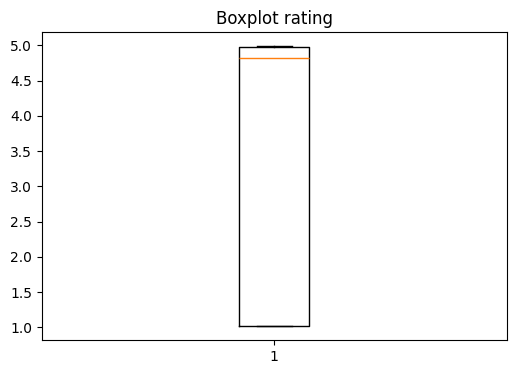

Outlier values:
Series([], Name: sentiment_score, dtype: float64)


In [ ]:
# mengecek outlier menggunakan z-score
plt.figure(figsize=(6, 4))
plt.boxplot(df_rating["sentiment_score"])
plt.title(f'Boxplot {"rating"}')
plt.show()

z_scores = stats.zscore(df_rating["sentiment_score"])
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)
outlier_values = df_rating["sentiment_score"][outliers]

print("Outlier values:")
print(outlier_values)

## ***Set Columns***

In [ ]:
df_rating = df_rating.rename(columns={'username': 'nama_akun'})
df_rating = df_rating.rename(columns={'title': 'judul_film'})
df_rating = df_rating.rename(columns={'sentiment_score': 'rating'})

## ***Missing Value***

In [ ]:
print(df_rating.isnull().sum())

judul_film    0
nama_akun     0
Text          0
Sentiment     0
rating        0
dtype: int64


In [ ]:
df_rating

,judul_film,nama_akun,Text,Sentiment,rating
0,Cargo,moviemenfes,this mvs is very sad nangiiis in this scene th...,Positive,4.971964
1,Layar,bicaraboxoffice,if for example there is one film that aired on...,Neutral,1.021166
2,What If,moviemenfes,mvs what if today? how come it s not in disney...,Neutral,1.014182
3,Layar,WatchmenID,for those who miss seeing arini on the big screen,Neutral,3.042384
4,Lightyear,ErikDavis,new trailer chris evans stars as buzz in a new...,Neutral,1.935174
...,...,...,...,...,...
34063,Rise,zavvi,the droids hold a special place in my heart an...,Positive,4.986464
34064,Rise,zavvi,okay campers rise and shine! this sunday at 7p...,Positive,4.981035
34065,Rise,zavvi,star wars episode ix the rise of skywalker zav...,Positive,4.919442
34066,Seasons,zavvi,season 1 6 blu ray boxset only 69 99 in our !,Negative,1.067592


# ***TEMPLATE DATASET***

## ***Dataset* Kosong**

Berisi kolom yang akan diisi untuk hasil prediksi *rating* sistem rekomendasi.

In [ ]:
columns = []
columns.append('nama film')
accounts = df_rating.nama_akun.unique()
for account_index in range (0, len(accounts)):
  columns.append(accounts[account_index])

data_entries = []
films = df_film.name
for film_index in range (0, len(films)):
  data_entries.append({'nama film' : films[film_index]})

In [ ]:
df = pd.DataFrame(columns=columns)
df = pd.concat([df, pd.DataFrame(data_entries)], ignore_index=True)
df.fillna(0, inplace=True)

## ***Merging Dataset***

Penggabungan kolom pada *dataset* dengan cara mengambil data nama akun dan judul film sebagai kolom, serta *rating* sebagai *value*.

In [ ]:
for rating_index in range(len(df_rating)):
    df[df_rating["nama_akun"][rating_index]].loc[df["nama film"] == df_rating["judul_film"][rating_index]] = round(df_rating["rating"][rating_index],2)

df

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,14 Cameras,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,17 Again,1.02,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,1.02,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,1BR,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.0,4.98,0.0,0.0,0.0,0.0
3,3 Days to Kill,0.00,0.0,0.00,0.0,1.02,1.04,4.99,0.00,0.0,...,0.00,1.06,0.0,0.0,3.0,0.00,0.0,0.0,0.0,0.0
4,3 Idiots,4.92,0.0,1.03,0.0,0.00,0.00,1.02,4.98,0.0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,Zombieland,4.96,0.0,4.98,0.0,1.03,4.88,4.93,4.98,0.0,...,1.02,4.99,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
850,iNumber Number: Jozi Gold,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
851,¡Que viva México!,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
852,¿Encontró lo que buscaba?,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


# ***DATASET* SIAP OLAH**

## ***Sparsity Data***

Sparse data merujuk pada situasi di mana sebagian besar nilai dalam suatu dataset adalah nol

In [ ]:
jumlah_nilai_nol = (df.iloc[:, 1:] == 0).sum().sum()
jumlah_total = df.iloc[:, 1:].size
persentase_sparsity = (jumlah_nilai_nol / jumlah_total) * 100

print(f"Jumlah nilai 0 dalam dataset: {jumlah_nilai_nol}")
print(f"Persentase sparsity: {persentase_sparsity:.2f}%")

Jumlah nilai 0 dalam dataset: 29677
Persentase sparsity: 89.10%


In [ ]:
def cek_nilai_nol(row):
    return len([value for value in row if value != 0])

df['Nilai Nol'] = df.apply(cek_nilai_nol, axis=1)
df_film['Nilai Nol'] = df['Nilai Nol']

df = df[df['Nilai Nol'] > 5]
df_film = df_film[df_film['Nilai Nol'] > 5]

df = df.drop('Nilai Nol', axis=1)
df = df.reset_index(drop=True)

df_film = df_film.drop('Nilai Nol', axis=1)
df_film = df_film.reset_index(drop=True)

df

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.00,0.00,0.00,0.00,1.02,1.04,4.99,0.00,0.00,...,0.00,1.06,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00
1,3 Idiots,4.92,0.00,1.03,0.00,0.00,0.00,1.02,4.98,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,5 Cowok Jagoan,0.00,1.02,0.00,0.00,0.00,4.97,4.99,4.98,0.00,...,0.00,0.00,0.00,0.00,0.00,4.98,0.00,0.00,0.00,0.00
3,6 Underground,4.84,2.99,0.00,0.00,4.89,3.30,0.00,1.02,0.00,...,0.00,1.01,0.00,0.00,0.00,4.98,0.00,0.00,0.00,0.00
4,65,1.02,1.02,4.94,2.32,1.05,1.15,4.08,1.30,1.03,...,4.98,4.98,4.99,4.98,4.98,1.02,1.02,0.00,1.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,You People,1.01,0.00,0.00,4.04,0.00,0.00,0.00,0.00,4.89,...,0.00,0.00,0.00,1.05,0.00,0.00,1.02,0.00,0.00,1.02
278,Young Adult,0.00,0.00,0.00,0.00,0.00,1.42,1.01,4.99,0.00,...,0.00,4.97,0.00,0.00,4.98,0.00,0.00,0.00,0.00,0.00
279,Your Place or Mine,4.97,0.00,0.00,4.96,0.00,0.00,0.00,0.00,4.98,...,0.00,0.00,0.00,0.00,0.00,1.01,1.02,0.00,0.00,0.00
280,Zodiac,4.97,0.00,1.02,0.00,0.00,1.31,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.33,0.00,0.00


In [ ]:
# cek setelah di drop beberapa film
jumlah_nilai_nol = (df.iloc[:, 1:] == 0).sum().sum()
jumlah_total = df.iloc[:, 1:].size
persentase_sparsity = (jumlah_nilai_nol / jumlah_total) * 100

print(f"Jumlah nilai 0 dalam dataset: {jumlah_nilai_nol}")
print(f"Persentase sparsity: {persentase_sparsity:.2f}%")

Jumlah nilai 0 dalam dataset: 7873
Persentase sparsity: 71.59%


## ***Data Normalization***

Menggunakan ***Min-Max Scaler*** untuk mengubah nilai-nilai dalam suatu fitur (*variabel*) sehingga rentang nilainya antara 0 hingga 1. Guna menghindari bias yang dapat timbul jika beberapa fitur memiliki skala yang jauh berbeda dalam data.

In [ ]:
df_normalized = df.copy()

scaler = MinMaxScaler()
columns = df.columns[1:]
df_normalized[columns] = scaler.fit_transform(df_normalized[columns])

df_normalized

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.000000,0.000000,0.000000,0.000000,0.204409,0.208417,1.000000,0.000000,0.000000,...,0.000000,0.212425,0.0,0.000000,0.601202,0.000000,0.000000,0.000000,0.000000,0.0
1,3 Idiots,0.985972,0.000000,0.206413,0.000000,0.000000,0.000000,0.204409,0.997996,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,5 Cowok Jagoan,0.000000,0.204409,0.000000,0.000000,0.000000,0.995992,1.000000,0.997996,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.997996,0.000000,0.000000,0.000000,0.0
3,6 Underground,0.969940,0.599198,0.000000,0.000000,0.979960,0.661323,0.000000,0.204409,0.000000,...,0.000000,0.202405,0.0,0.000000,0.000000,0.997996,0.000000,0.000000,0.000000,0.0
4,65,0.204409,0.204409,0.989980,0.464930,0.210421,0.230461,0.817635,0.260521,0.206827,...,0.997996,0.997996,1.0,0.997996,0.997996,0.204409,0.204409,0.000000,0.204409,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,You People,0.202405,0.000000,0.000000,0.809619,0.000000,0.000000,0.000000,0.000000,0.981928,...,0.000000,0.000000,0.0,0.210421,0.000000,0.000000,0.204409,0.000000,0.000000,1.0
278,Young Adult,0.000000,0.000000,0.000000,0.000000,0.000000,0.284569,0.202405,1.000000,0.000000,...,0.000000,0.995992,0.0,0.000000,0.997996,0.000000,0.000000,0.000000,0.000000,0.0
279,Your Place or Mine,0.995992,0.000000,0.000000,0.993988,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.202405,0.204409,0.000000,0.000000,0.0
280,Zodiac,0.995992,0.000000,0.204409,0.000000,0.000000,0.262525,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.266533,0.000000,0.0


## ***Transposing Dataset***

In [ ]:
df_transposed = df_normalized.set_index('nama film').T
df_transposed

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000000,0.985972,0.000000,0.969940,0.204409,0.997996,1.000000,0.202405,0.997996,0.000000,...,0.204409,0.202405,0.204409,0.202405,1.000000,0.202405,0.000000,0.995992,0.995992,0.993988
bicaraboxoffice,0.000000,0.000000,0.204409,0.599198,0.204409,0.000000,0.000000,0.218437,0.000000,0.204409,...,0.825651,0.204409,0.989980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WatchmenID,0.000000,0.206413,0.000000,0.000000,0.989980,0.000000,0.000000,0.995992,0.000000,0.000000,...,0.995992,0.989980,0.000000,0.000000,0.975952,0.000000,0.000000,0.000000,0.204409,0.997996
ErikDavis,0.000000,0.000000,0.000000,0.000000,0.464930,0.000000,0.000000,0.995992,0.000000,0.000000,...,0.000000,0.204409,0.000000,0.000000,0.000000,0.809619,0.000000,0.993988,0.000000,0.000000
arulfittron,0.204409,0.000000,0.000000,0.979960,0.210421,0.000000,0.204409,0.000000,0.000000,0.204409,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.206413
GilaFilmID,0.208417,0.000000,0.995992,0.661323,0.230461,0.000000,0.000000,0.202405,0.993988,0.997996,...,0.204409,0.204409,0.997996,0.993988,0.000000,0.000000,0.284569,0.000000,0.262525,0.977956
TarizSolis,1.000000,0.204409,1.000000,0.000000,0.817635,0.000000,0.000000,1.000000,0.651303,0.595190,...,0.206413,0.000000,0.997996,0.000000,0.000000,0.000000,0.202405,0.000000,0.000000,0.987976
djaycoholyc,0.000000,0.997996,0.997996,0.204409,0.260521,0.997996,0.000000,0.993988,0.997996,0.264529,...,0.000000,0.987976,1.000000,0.000000,0.997996,0.000000,1.000000,0.000000,0.000000,0.997996
akstanwyck,0.000000,0.000000,0.000000,0.000000,0.206827,0.000000,0.000000,0.859438,0.000000,0.000000,...,0.000000,0.206827,0.000000,0.000000,0.000000,0.981928,0.000000,1.000000,0.000000,0.000000
slashfilm,0.000000,0.000000,0.000000,0.000000,0.206413,0.000000,0.000000,0.204409,0.000000,0.000000,...,0.967936,0.987976,0.000000,0.000000,0.000000,0.995992,0.000000,0.995992,0.000000,0.000000


In [ ]:
# # dataset siap olah
# df_transposed.to_excel("Dataset_Siap_Olah.xlsx", index=True)

# **DISTRIBUSI DATA**

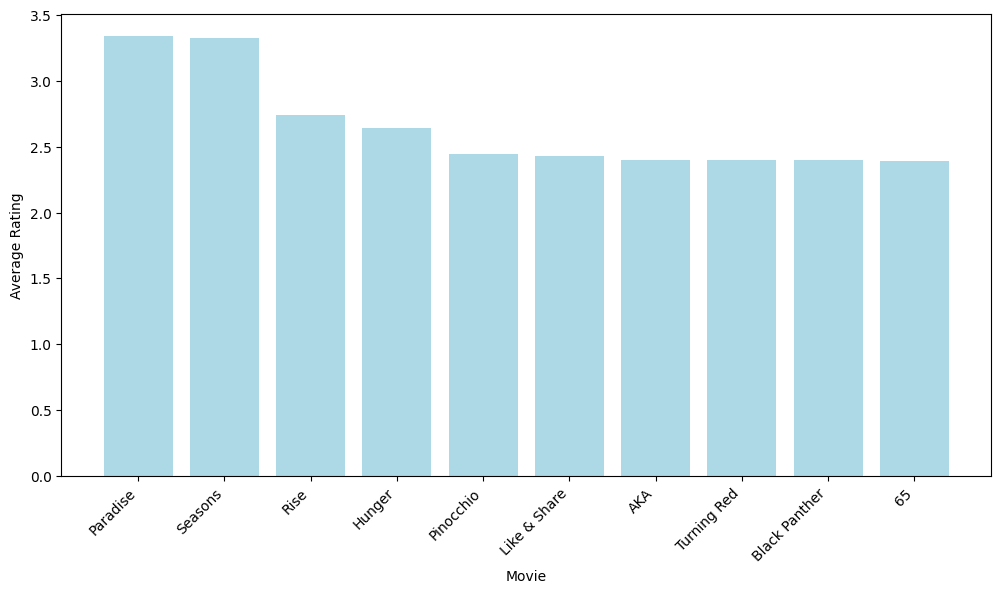

In [ ]:
data = df.copy()
# data = data.replace(0, np.NAN)

data["average"] = data.iloc[:, 1:].mean(axis=1)
data = data.sort_values("average", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(data["nama film"][:10], data["average"][:10], color='lightblue')
plt.xlabel("Movie")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.show()

# ***COLLABORATIVE FILTERING***

In [ ]:
df_cf = df_transposed.copy()
df_cf

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000000,0.985972,0.000000,0.969940,0.204409,0.997996,1.000000,0.202405,0.997996,0.000000,...,0.204409,0.202405,0.204409,0.202405,1.000000,0.202405,0.000000,0.995992,0.995992,0.993988
bicaraboxoffice,0.000000,0.000000,0.204409,0.599198,0.204409,0.000000,0.000000,0.218437,0.000000,0.204409,...,0.825651,0.204409,0.989980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WatchmenID,0.000000,0.206413,0.000000,0.000000,0.989980,0.000000,0.000000,0.995992,0.000000,0.000000,...,0.995992,0.989980,0.000000,0.000000,0.975952,0.000000,0.000000,0.000000,0.204409,0.997996
ErikDavis,0.000000,0.000000,0.000000,0.000000,0.464930,0.000000,0.000000,0.995992,0.000000,0.000000,...,0.000000,0.204409,0.000000,0.000000,0.000000,0.809619,0.000000,0.993988,0.000000,0.000000
arulfittron,0.204409,0.000000,0.000000,0.979960,0.210421,0.000000,0.204409,0.000000,0.000000,0.204409,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.206413
GilaFilmID,0.208417,0.000000,0.995992,0.661323,0.230461,0.000000,0.000000,0.202405,0.993988,0.997996,...,0.204409,0.204409,0.997996,0.993988,0.000000,0.000000,0.284569,0.000000,0.262525,0.977956
TarizSolis,1.000000,0.204409,1.000000,0.000000,0.817635,0.000000,0.000000,1.000000,0.651303,0.595190,...,0.206413,0.000000,0.997996,0.000000,0.000000,0.000000,0.202405,0.000000,0.000000,0.987976
djaycoholyc,0.000000,0.997996,0.997996,0.204409,0.260521,0.997996,0.000000,0.993988,0.997996,0.264529,...,0.000000,0.987976,1.000000,0.000000,0.997996,0.000000,1.000000,0.000000,0.000000,0.997996
akstanwyck,0.000000,0.000000,0.000000,0.000000,0.206827,0.000000,0.000000,0.859438,0.000000,0.000000,...,0.000000,0.206827,0.000000,0.000000,0.000000,0.981928,0.000000,1.000000,0.000000,0.000000
slashfilm,0.000000,0.000000,0.000000,0.000000,0.206413,0.000000,0.000000,0.204409,0.000000,0.000000,...,0.967936,0.987976,0.000000,0.000000,0.000000,0.995992,0.000000,0.995992,0.000000,0.000000


## **Fungsi Mencari Rata-Rata dan Top N**

In [ ]:
# menghitung rata-rata
def average(df, film_name):
    """Calculates the average rating for a given film in a transposed DataFrame."""
    if film_name in df.columns:
        ratings = df[film_name]
        # Filter out non-zero ratings
        valid_ratings = ratings[ratings != 0]
        if not valid_ratings.empty:
            return round(valid_ratings.mean(), 2)
    return 0

In [ ]:
# mencari top n
def top_n(n, df, col):
    top_values = df[col].nlargest(n)
    return top_values

# ***USER-BASED***

In [ ]:
print(df_transposed.columns)

Index(['3 Days to Kill', '3 Idiots', '5 Cowok Jagoan', '6 Underground', '65',
       'A Classic Horror Story', 'A Ghost Story', 'A Man Called Otto',
       'A Perfect Fit', 'A Wrinkle in Time',
       ...
       'Weathering', 'What If', 'Why Do You Love Me', 'Wind River',
       'Wish Dragon', 'You People', 'Young Adult', 'Your Place or Mine',
       'Zodiac', 'Zombieland'],
      dtype='object', name='nama film', length=282)


In [ ]:
user_based_df = df_normalized.copy()
temp = df_transposed
target = df_cf.copy()

for i in range(len(user_based_df)):
    for j in range(len(temp.index)): # Corrected: Iterate over the index of temp
        if (user_based_df[temp.index[j]][i] != 0): # Corrected: Access movie name from the index
            user_based_df[temp.index[j]][i] -= average(target,user_based_df['nama film'][i])
user_based_df

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.000000,0.000000,0.000000,0.000000,-0.445591,-0.441583,0.350000,0.000000,0.000000,...,0.000000,-0.437575,0.00,0.000000,-0.048798,0.000000,0.000000,0.000000,0.000000,0.00
1,3 Idiots,0.485972,0.000000,-0.293587,0.000000,0.000000,0.000000,-0.295591,0.497996,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,5 Cowok Jagoan,0.000000,-0.665591,0.000000,0.000000,0.000000,0.125992,0.130000,0.127996,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.127996,0.000000,0.000000,0.000000,0.00
3,6 Underground,0.189940,-0.180802,0.000000,0.000000,0.199960,-0.118677,0.000000,-0.575591,0.000000,...,0.000000,-0.577595,0.00,0.000000,0.000000,0.217996,0.000000,0.000000,0.000000,0.00
4,65,-0.365591,-0.365591,0.419980,-0.105070,-0.359579,-0.339539,0.247635,-0.309479,-0.363173,...,0.427996,0.427996,0.43,0.427996,0.427996,-0.365591,-0.365591,0.000000,-0.365591,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,You People,-0.327595,0.000000,0.000000,0.279619,0.000000,0.000000,0.000000,0.000000,0.451928,...,0.000000,0.000000,0.00,-0.319579,0.000000,0.000000,-0.325591,0.000000,0.000000,0.47
278,Young Adult,0.000000,0.000000,0.000000,0.000000,0.000000,-0.485431,-0.567595,0.230000,0.000000,...,0.000000,0.225992,0.00,0.000000,0.227996,0.000000,0.000000,0.000000,0.000000,0.00
279,Your Place or Mine,0.165992,0.000000,0.000000,0.163988,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.000000,0.00,0.000000,0.000000,-0.627595,-0.625591,0.000000,0.000000,0.00
280,Zodiac,0.375992,0.000000,-0.415591,0.000000,0.000000,-0.357475,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,-0.353467,0.000000,0.00


## ***Cosine Similarity***

In [ ]:
# Mengambil kolom dengan nilai-nilai rating
rating_matrix2 = user_based_df.iloc[:, 1:]
sim_user = cosine_similarity(rating_matrix2.T)

sim_user_cs = pd.DataFrame(sim_user, index=user_based_df.iloc[:, 1:].columns, columns=user_based_df.iloc[:, 1:].columns)
sim_user_cs

,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,slashfilm,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
moviemenfes,1.000000,-0.098355,-0.121858,-0.071668,-0.009702,0.029794,-0.028433,0.009070,-0.070415,-0.009112,...,-0.025771,-0.148491,0.031034,-0.171392,-0.092919,0.056612,-0.012079,-0.131764,-0.033504,-0.023441
bicaraboxoffice,-0.098355,1.000000,-0.094623,0.007704,-0.083390,-0.092784,-0.067123,-0.004668,-0.057483,0.013228,...,-0.030522,0.033314,-0.139496,-0.114316,0.001203,-0.056911,0.072566,0.006759,0.003140,-0.064647
WatchmenID,-0.121858,-0.094623,1.000000,-0.131679,-0.084709,-0.075831,-0.097459,-0.071844,0.179634,0.051972,...,-0.078681,-0.015454,-0.108885,0.187856,0.009508,-0.163214,-0.181015,-0.043083,-0.025950,-0.057652
ErikDavis,-0.071668,0.007704,-0.131679,1.000000,-0.018965,-0.039114,-0.053516,-0.109308,0.120971,0.109297,...,0.042021,-0.032230,-0.008357,-0.082393,-0.019629,0.092060,-0.055448,0.000000,0.066830,0.197184
arulfittron,-0.009702,-0.083390,-0.084709,-0.018965,1.000000,0.034896,-0.097690,-0.036049,-0.158320,-0.033693,...,-0.022729,-0.012050,-0.055884,-0.132046,-0.164550,0.003729,0.046515,-0.099103,0.043429,-0.043170
GilaFilmID,0.029794,-0.092784,-0.075831,-0.039114,0.034896,1.000000,-0.080559,-0.062016,-0.013031,-0.127269,...,-0.029312,-0.112603,-0.125668,0.000590,0.041569,0.109022,0.125130,-0.107719,0.132931,0.030756
TarizSolis,-0.028433,-0.067123,-0.097459,-0.053516,-0.097690,-0.080559,1.000000,-0.231631,-0.025772,-0.086042,...,-0.090771,-0.074350,0.027442,-0.035140,-0.080486,-0.065148,0.090798,-0.016788,-0.055131,0.035492
djaycoholyc,0.009070,-0.004668,-0.071844,-0.109308,-0.036049,-0.062016,-0.231631,1.000000,-0.067304,-0.031442,...,-0.143263,0.028282,-0.042570,-0.115626,-0.013125,-0.097758,-0.076767,-0.039941,-0.008866,-0.065224
akstanwyck,-0.070415,-0.057483,0.179634,0.120971,-0.158320,-0.013031,-0.025772,-0.067304,1.000000,0.069292,...,-0.166248,-0.064867,0.031821,0.221444,0.063849,-0.046984,-0.118781,0.000000,0.096261,0.239418
slashfilm,-0.009112,0.013228,0.051972,0.109297,-0.033693,-0.127269,-0.086042,-0.031442,0.069292,1.000000,...,-0.092163,-0.046361,-0.017237,0.103134,-0.010446,-0.047278,-0.088017,0.000000,-0.009900,0.082623


### **Mencari *Top N***

Menampilkan Top Film berdasarkan nilai *similarity* hasil dari ***cosine similarity***

In [ ]:
def cek_topN_user(nama_akun):
    print('Pengguna yang mirip dengan Akun "{}" adalah:\n'.format(nama_akun))

    # mengurutkan film berdasarkan similarity
    similar_acc = sim_user_cs.sort_values(by=nama_akun, ascending=False).index[1:11]

    for rank, similar_acc in enumerate(similar_acc, start=1):
        # nilai similarity
        similarity_score = sim_user_cs.loc[similar_acc, nama_akun]
        print("No. {}: Akun {} (Score: {:.4f})".format(rank, similar_acc, similarity_score))

In [ ]:
akun = "moviemenfes"
cek_topN_user(akun)

Pengguna yang mirip dengan Akun "moviemenfes" adalah:

No. 1: Akun commaditya (Score: 0.0796)
No. 2: Akun asliga (Score: 0.0566)
No. 3: Akun kampusfilmID (Score: 0.0385)
No. 4: Akun sinemagerbanget (Score: 0.0310)
No. 5: Akun GilaFilmID (Score: 0.0298)
No. 6: Akun Rivki_Mogi (Score: 0.0201)
No. 7: Akun djaycoholyc (Score: 0.0091)
No. 8: Akun sir_amirsyarif (Score: 0.0036)
No. 9: Akun KermodeMovie (Score: -0.0015)
No. 10: Akun HabisNontonFilm (Score: -0.0019)


## ***FIND OPTIMAL $N$***

In [ ]:
rating_df_ub = df_transposed
target = df_normalized.copy()

# inisialisasi array untuk menyimpan ukuran sampel, RMSE, dan MAE
sample_arr2 = []
rmse_user_cs = []
mae_user_cs = []

for n in range(2, 41):
    sample = n
    prediction_df = df_normalized.copy()

    original_rating = np.array([])
    predicted_rating = np.array([])

    # iterasi setiap pengguna di df target
    for i in range(len(prediction_df)):
        # user similarity
        # Corrected: Iterate through the columns of prediction_df (user names)
        for user_col in prediction_df.columns[1:]:
            # Check if the user has rated the movie
            if (prediction_df[user_col][i] != 0):

                numerator = 0
                denominator = 0
                # Top N similar users
                tmp = top_n(sample, sim_user_cs, user_col)

                # top N similar users
                for k in range(len(tmp)):
                    if (tmp.index[k] != user_col):
                        # update numerator dan denominator
                        numerator += (user_based_df[tmp.index[k]][i]) * tmp.iloc[k]
                        denominator += tmp.iloc[k]

                if(denominator != 0):
                    # update user and film
                    # Corrected: Use the modified average function with the transposed df and film name
                    prediction_df[user_col][i] = average(rating_df_ub, prediction_df['nama film'][i]) + (numerator / denominator)

        # iterasi setiap prediksi rating
        # Corrected: Iterate over film names in the original df_normalized
        for film_name in df_normalized.columns[1:]:
            if(prediction_df[film_name][i] != 0):
                predicted_rating = np.append(predicted_rating, prediction_df[film_name][i])
                original_rating = np.append(original_rating, df_normalized[film_name][i])


    rmse_user_cs.append(round(math.sqrt(np.mean((predicted_rating - original_rating) ** 2)), 4))
    mae_user_cs.append(round(np.mean(np.abs(predicted_rating - original_rating)), 4))
    sample_arr2.append(sample)

In [ ]:
for i in range(len(sample_arr2)):
    print(f"Nilai N: {sample_arr2[i]}, RMSE: {rmse_user_cs[i]}, MAE: {mae_user_cs[i]}")

Nilai N: 2, RMSE: 0.3537, MAE: 0.272
Nilai N: 3, RMSE: 0.3332, MAE: 0.2717
Nilai N: 4, RMSE: 0.3256, MAE: 0.272
Nilai N: 5, RMSE: 0.3232, MAE: 0.2724
Nilai N: 6, RMSE: 0.3216, MAE: 0.2735
Nilai N: 7, RMSE: 0.3207, MAE: 0.2741
Nilai N: 8, RMSE: 0.3205, MAE: 0.2747
Nilai N: 9, RMSE: 0.3204, MAE: 0.2753
Nilai N: 10, RMSE: 0.3205, MAE: 0.2758
Nilai N: 11, RMSE: 0.3205, MAE: 0.2761
Nilai N: 12, RMSE: 0.3206, MAE: 0.2762
Nilai N: 13, RMSE: 0.3206, MAE: 0.2763
Nilai N: 14, RMSE: 0.3207, MAE: 0.2763
Nilai N: 15, RMSE: 0.3208, MAE: 0.2762
Nilai N: 16, RMSE: 0.3209, MAE: 0.2759
Nilai N: 17, RMSE: 0.3211, MAE: 0.2753
Nilai N: 18, RMSE: 0.3216, MAE: 0.2746
Nilai N: 19, RMSE: 0.3223, MAE: 0.2737
Nilai N: 20, RMSE: 0.3251, MAE: 0.2736
Nilai N: 21, RMSE: 0.3336, MAE: 0.2762
Nilai N: 22, RMSE: 0.3934, MAE: 0.301
Nilai N: 23, RMSE: 3.0018, MAE: 0.7751
Nilai N: 24, RMSE: 0.6329, MAE: 0.3782
Nilai N: 25, RMSE: 0.4227, MAE: 0.3196
Nilai N: 26, RMSE: 0.6493, MAE: 0.3807
Nilai N: 27, RMSE: 2.0049, MAE: 0.70

In [ ]:
min_rmse_index = np.argmin(rmse_user_cs)
min_mae_index = np.argmin(mae_user_cs)

print(f"Pada nilai N = {sample_arr2[min_rmse_index]}, mendapatkan:")
print(f"   - Nilai RMSE minimum = {rmse_user_cs[min_rmse_index]}")
print(f"   - Nilai MAE minimum  = {mae_user_cs[min_mae_index]}")

Pada nilai N = 9, mendapatkan:
   - Nilai RMSE minimum = 0.3204
   - Nilai MAE minimum  = 0.2717


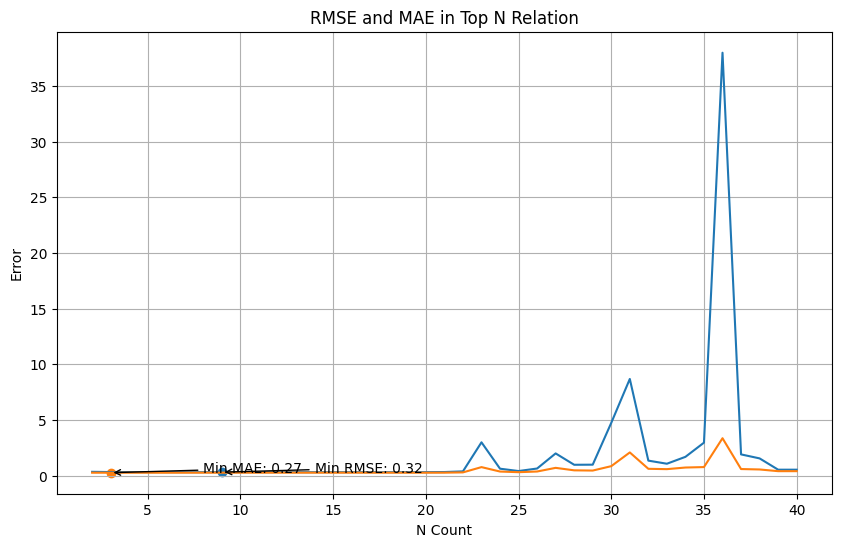

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sample_arr2, rmse_user_cs, label='RMSE')
plt.plot(sample_arr2, mae_user_cs, label='MAE')
plt.scatter(sample_arr2[min_rmse_index], rmse_user_cs[min_rmse_index], marker='o', label='Min RMSE')
plt.scatter(sample_arr2[min_mae_index], mae_user_cs[min_mae_index], marker='o', label='Min MAE')

plt.annotate(f'Min RMSE: {rmse_user_cs[min_rmse_index]:.2f}',
             xy=(sample_arr2[min_rmse_index], rmse_user_cs[min_rmse_index]),
             xytext=(sample_arr2[min_rmse_index] + 5, rmse_user_cs[min_rmse_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(f'Min MAE: {mae_user_cs[min_mae_index]:.2f}',
             xy=(sample_arr2[min_mae_index], mae_user_cs[min_mae_index]),
             xytext=(sample_arr2[min_mae_index] + 5, mae_user_cs[min_mae_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel('N Count')
plt.ylabel('Error')
plt.title('RMSE and MAE in Top N Relation')
plt.grid(True)
plt.show()

## ***PREDICT RATING***

In [ ]:
n = 19
df_pred_ub = df_normalized.copy()

# prediksi
for i in range(len(df_pred_ub)):
    # similarity
    # Corrected: Iterate through the columns of df_pred_ub (user names)
    for user_col in df_pred_ub.columns[1:]:
        # memeriksa apakah nilai sama dengan 0
        if (df_pred_ub[user_col][i] == 0):

            numerator = 0
            denominator = 0

            tmp = top_n(n, sim_user_cs, user_col)
            for k in range(len(tmp)):
                if tmp.index[k] != user_col:

                    numerator += ((user_based_df[tmp.index[k]][i]) * tmp.iloc[k])
                    denominator += tmp.iloc[k]

            if denominator != 0 :
                # update nilai prediksi
                df_pred_ub[user_col][i] = average(df_transposed, df_pred_ub['nama film'][i]) + (numerator/denominator)
df_pred_ub

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.543029,0.691928,0.672217,0.656321,0.204409,0.208417,1.000000,0.729546,0.657493,...,0.659883,0.212425,0.658601,0.658695,0.601202,0.602683,0.638748,0.650000,0.601710,0.657870
1,3 Idiots,0.985972,0.525874,0.206413,0.488466,0.488102,0.525989,0.204409,0.997996,0.468860,...,0.500954,0.423286,0.500318,0.469448,0.502098,0.526373,0.488700,0.467144,0.478602,0.494330
2,5 Cowok Jagoan,0.959424,0.204409,0.885095,0.875579,0.885624,0.995992,1.000000,0.997996,0.869031,...,0.901987,0.812293,0.879302,0.883503,0.898952,0.997996,0.869182,0.868085,0.889663,0.877071
3,6 Underground,0.969940,0.599198,0.781936,0.827735,0.979960,0.661323,0.794445,0.204409,0.780913,...,0.842075,0.202405,0.794919,0.784595,0.771342,0.997996,0.801592,0.836886,0.798134,0.784456
4,65,0.204409,0.204409,0.989980,0.464930,0.210421,0.230461,0.817635,0.260521,0.206827,...,0.997996,0.997996,1.000000,0.997996,0.997996,0.204409,0.204409,0.745278,0.204409,0.598308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,You People,0.202405,0.530313,0.527342,0.809619,0.429577,0.502088,0.397810,0.423217,0.981928,...,0.531472,0.397841,0.550419,0.210421,0.434774,0.509255,0.204409,0.452481,0.544995,1.000000
278,Young Adult,0.681909,0.813861,0.823844,0.755220,0.753730,0.284569,0.202405,1.000000,0.786728,...,0.769695,0.995992,0.759127,0.830001,0.997996,0.744002,0.695248,0.710410,0.738307,0.756626
279,Your Place or Mine,0.995992,0.771289,0.889520,0.993988,0.759506,0.656668,0.589857,0.880666,1.000000,...,0.719515,0.927879,0.909168,0.887580,0.772571,0.202405,0.204409,0.928753,0.770173,0.899591
280,Zodiac,0.995992,0.713584,0.204409,0.629007,0.612038,0.262525,0.654854,0.689237,0.578670,...,0.622825,0.883060,0.643909,0.569534,0.601599,0.609504,0.609136,0.266533,0.567107,0.614058


***SAVING DATAFRAME***

In [ ]:
df_pred_ub.to_excel("ResultCF_UB_DistilBERT.xlsx")

In [ ]:
from google.colab import files
files.download("ResultCF_UB_DistilBERT.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ***EVALUATION***

In [ ]:
df_actualub= df_normalized.copy()
df_predub = pd.read_excel("ResultCF_UB_DistilBERT.xlsx")
df_predub = df_predub.drop("Unnamed: 0", axis=1)

df_actual_values = df_actualub.drop(columns='nama film').to_numpy()
df_pred_values = df_predub.drop(columns='nama film').to_numpy()

y_actualub = df_actual_values.flatten()
y_predub = df_pred_values.flatten()

In [ ]:
MAE_ub = mean_absolute_error(y_actualub, y_predub)
MSE_ub = mean_squared_error(y_actualub, y_predub)
rmse_cbf_ub = math.sqrt(MSE_ub)

print("Mean Absolute Error (MAE):", MAE_ub)
print("Root Mean Square Error (RMSE):", rmse_cbf_ub)

Mean Absolute Error (MAE): 0.5170733813208072
Root Mean Square Error (RMSE): 0.6265654226693239


# ***ITEM-BASED***

In [ ]:
item_based_df = df_transposed

for i in range(len(item_based_df)):
    # Corrected: Iterate over the columns of item_based_df (movie names)
    for movie_col in item_based_df.columns:
        if (item_based_df[movie_col][i] != 0):
            # Corrected: Pass item_based_df to the average function and access column names directly
            item_based_df.loc[item_based_df.index[i], movie_col] -= average(item_based_df, movie_col)
item_based_df

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000000,0.485972,0.000000,0.189940,-0.365591,0.227996,0.400000,-0.587595,0.047996,0.000000,...,-0.405591,-0.397595,-0.635591,-0.357595,0.090000,-0.327595,0.000000,0.165992,0.375992,0.143988
bicaraboxoffice,0.000000,0.000000,-0.665591,-0.100802,-0.345591,0.000000,0.000000,-0.521563,0.000000,-0.255591,...,0.245651,-0.365591,0.229980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WatchmenID,0.000000,-0.223587,0.000000,0.000000,0.459980,0.000000,0.000000,0.305992,0.000000,0.000000,...,0.455992,0.449980,0.000000,0.000000,0.165952,0.000000,0.000000,0.000000,-0.315591,0.197996
ErikDavis,0.000000,0.000000,0.000000,0.000000,-0.055070,0.000000,0.000000,0.345992,0.000000,0.000000,...,0.000000,-0.315591,0.000000,0.000000,0.000000,0.319619,0.000000,0.223988,0.000000,0.000000
arulfittron,-0.445591,0.000000,0.000000,0.339960,-0.289579,0.000000,-0.295591,0.000000,0.000000,-0.195591,...,0.000000,0.000000,0.000000,0.000000,0.280000,0.000000,0.000000,0.000000,0.000000,-0.543587
GilaFilmID,-0.361583,0.000000,0.275992,0.081323,-0.259539,0.000000,0.000000,-0.407595,0.163988,0.647996,...,-0.305591,-0.295591,0.317996,0.493988,0.000000,0.000000,-0.485431,0.000000,-0.167475,0.267956
TarizSolis,0.500000,-0.155591,0.400000,0.000000,0.347635,0.000000,0.000000,0.430000,-0.078697,0.285190,...,-0.273587,0.000000,0.387996,0.000000,0.000000,0.000000,-0.487595,0.000000,0.000000,0.317976
djaycoholyc,0.000000,0.687996,0.497996,-0.325591,-0.199479,0.337996,0.000000,0.453988,0.357996,-0.005471,...,0.000000,0.517976,0.450000,0.000000,0.357996,0.000000,0.380000,0.000000,0.000000,0.367996
akstanwyck,0.000000,0.000000,0.000000,0.000000,-0.233173,0.000000,0.000000,0.359438,0.000000,0.000000,...,0.000000,-0.243173,0.000000,0.000000,0.000000,0.521928,0.000000,0.290000,0.000000,0.000000
slashfilm,0.000000,0.000000,0.000000,0.000000,-0.223587,0.000000,0.000000,-0.265591,0.000000,0.000000,...,0.517936,0.557976,0.000000,0.000000,0.000000,0.575992,0.000000,0.335992,0.000000,0.000000


## ***Cosine Similarity***

In [ ]:
# mengambil kolom dengan nilai-nilai rating
rating_matrix1 = item_based_df.iloc[:, 1:]
sim_item = cosine_similarity(rating_matrix1.T)

sim_item_cs = pd.DataFrame(sim_item, index=item_based_df.iloc[:, 1:].columns, columns=item_based_df.iloc[:, 1:].columns)
sim_item_cs

nama film,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,AKA,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
nama film,,,,,,,,,,,,,,,,,,,,,
3 Idiots,1.000000,0.214278,-0.126120,-0.182658,0.272728,0.175273,-0.077118,0.219069,-0.089257,-0.070059,...,-0.128918,0.012155,-0.059664,-0.172577,0.210222,-0.093829,0.184896,0.045106,0.217415,0.041028
5 Cowok Jagoan,0.214278,1.000000,0.205181,0.155561,-0.029435,0.000000,0.352501,0.403680,0.327236,0.025537,...,-0.142262,0.248141,0.070661,0.079644,0.354221,0.000000,-0.063627,-0.045570,-0.033009,0.161857
6 Underground,-0.126120,0.205181,1.000000,-0.078269,0.084170,-0.138414,0.135900,0.361071,0.279308,0.001284,...,-0.112194,-0.000798,0.018191,0.240912,0.131743,-0.069156,-0.065354,0.083442,0.543244,0.144394
65,-0.182658,0.155561,-0.078269,1.000000,0.031920,0.059425,0.253936,-0.005918,0.034310,0.501485,...,0.448969,0.360101,0.082421,0.065672,0.186750,0.155075,0.294154,0.163074,-0.123381,0.335862
A Classic Horror Story,0.272728,-0.029435,0.084170,0.031920,1.000000,-0.013038,0.205825,0.275753,0.325499,0.002631,...,0.340949,0.204268,0.427040,0.156494,-0.054109,-0.110366,0.587422,0.022265,0.070470,0.393820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You People,-0.093829,0.000000,-0.069156,0.155075,-0.110366,-0.051834,0.042137,-0.049410,-0.073657,-0.028113,...,0.234102,0.000178,0.029352,0.007962,0.015187,1.000000,-0.042894,0.240937,-0.072804,-0.057044
Young Adult,0.184896,-0.063627,-0.065354,0.294154,0.587422,0.161563,0.187620,0.148289,-0.058928,0.122312,...,0.499147,0.370170,0.322433,0.121040,0.125896,-0.042894,1.000000,-0.054107,-0.058636,0.225689
Your Place or Mine,0.045106,-0.045570,0.083442,0.163074,0.022265,0.037346,0.447074,0.317480,-0.001974,0.083417,...,0.027966,0.214241,0.108231,0.119599,0.116518,0.240937,-0.054107,1.000000,0.221509,0.528535


### **Mencari *Top N***

Menampilkan Top Film berdasarkan nilai *similarity* hasil ***cosine similarity***

In [ ]:
def cek_topN(movie_title):
    print('Film yang mirip dengan "{}" adalah:\n'.format(movie_title))

    # mengurutkan film berdasarkan similarity
    similar_movies = sim_item_cs.sort_values(by=movie_title, ascending=False).index[1:11]

    for rank, similar_movie in enumerate(similar_movies, start=1):
        # nilai similarity
        similarity_score = sim_item_cs.loc[similar_movie, movie_title]
        print("No. {}: Film {} (Score: {:.4f})".format(rank, similar_movie, similarity_score))

In [ ]:
movies = "Merantau"
cek_topN(movies)

Film yang mirip dengan "Merantau" adalah:

No. 1: Film Sinister 2 (Score: 0.6423)
No. 2: Film Clash of the Titans (Score: 0.6114)
No. 3: Film The Woman in the Window (Score: 0.6031)
No. 4: Film Tanda Tanya (Score: 0.5929)
No. 5: Film Murder Mystery 2 (Score: 0.5878)
No. 6: Film The Smurfs (Score: 0.5756)
No. 7: Film The Roommate (Score: 0.5595)
No. 8: Film The Iron Lady (Score: 0.5445)
No. 9: Film Transcendence (Score: 0.5124)
No. 10: Film Young Adult (Score: 0.5030)


## ***FIND OPTIMAL $N$***

In [ ]:
sample_arr1 = np.empty([0])
rmse_item_cs = np.empty([0])
mae_item_cs = np.empty([0])

rating_df = df_transposed.copy()
original_df = df_transposed.copy()

# iterasi sampel n
for n in range(2, 51):
    sample = n

    # iterasi rows and columns
    for i in range(len(rating_df)):
        for j in range(len(sim_item_cs)):
            # Get the movie name from the columns of sim_item_cs
            movie_col_name = sim_item_cs.columns[j]

            if rating_df[movie_col_name][i] != 0:
                numerator = 0
                denominator = 0
                tmp = top_n(sample, sim_item_cs, movie_col_name)

                # iterasi top similar items
                for k in range(len(tmp)):
                    if tmp.index[k] != movie_col_name:
                        numerator += (item_based_df[tmp.index[k]][i] * tmp.iloc[k])
                        denominator += tmp.iloc[k]

                # update rating collaborative filtering
                if denominator != 0:
                    # Pass the transposed dataframe and the movie name to the average function
                    rating_df[movie_col_name][i] = average(df_transposed, movie_col_name) + (numerator / denominator)

    # inisialisasi array (perbandingan)
    original_df.head()
    original_rating = np.array([])
    predicted_rating = np.array([])

    # Corrected: Iterate over the columns of rating_df (movie names)
    for movie_col_name in rating_df.columns:
        # Iterate over the index of rating_df (user names)
        for user_index in range(len(rating_df)):
            if rating_df[movie_col_name][user_index] != 0:
                predicted_rating = np.append(predicted_rating, float(rating_df[movie_col_name][user_index]))
                # Access the original rating from original_df using user index and movie column name
                original_rating = np.append(original_rating, float(original_df[movie_col_name][user_index]))


    # evaluasi
    rmse_item_cs = np.append(rmse_item_cs, round(math.sqrt(mean_squared_error(predicted_rating, original_rating)), 4))
    mae_item_cs = np.append(mae_item_cs, round(np.mean(np.abs(predicted_rating - original_rating)), 4))
    sample_arr1 = np.append(sample_arr1, sample)

In [ ]:
for i in range(len(sample_arr1)):
    print(f"Nilai N: {sample_arr1[i]}, RMSE: {rmse_item_cs[i]}, MAE: {mae_item_cs[i]}")

Nilai N: 2.0, RMSE: 0.3626, MAE: 0.307
Nilai N: 3.0, RMSE: 0.3267, MAE: 0.2699
Nilai N: 4.0, RMSE: 0.3138, MAE: 0.2575
Nilai N: 5.0, RMSE: 0.3079, MAE: 0.2503
Nilai N: 6.0, RMSE: 0.3047, MAE: 0.2476
Nilai N: 7.0, RMSE: 0.303, MAE: 0.246
Nilai N: 8.0, RMSE: 0.3017, MAE: 0.2442
Nilai N: 9.0, RMSE: 0.3015, MAE: 0.2431
Nilai N: 10.0, RMSE: 0.3016, MAE: 0.2421
Nilai N: 11.0, RMSE: 0.3016, MAE: 0.242
Nilai N: 12.0, RMSE: 0.3014, MAE: 0.2421
Nilai N: 13.0, RMSE: 0.3014, MAE: 0.2417
Nilai N: 14.0, RMSE: 0.3015, MAE: 0.2418
Nilai N: 15.0, RMSE: 0.3018, MAE: 0.2421
Nilai N: 16.0, RMSE: 0.302, MAE: 0.2421
Nilai N: 17.0, RMSE: 0.3023, MAE: 0.2421
Nilai N: 18.0, RMSE: 0.3028, MAE: 0.2423
Nilai N: 19.0, RMSE: 0.3031, MAE: 0.2423
Nilai N: 20.0, RMSE: 0.3033, MAE: 0.2424
Nilai N: 21.0, RMSE: 0.3037, MAE: 0.2426
Nilai N: 22.0, RMSE: 0.304, MAE: 0.2429
Nilai N: 23.0, RMSE: 0.3044, MAE: 0.2429
Nilai N: 24.0, RMSE: 0.3047, MAE: 0.2432
Nilai N: 25.0, RMSE: 0.3052, MAE: 0.2438
Nilai N: 26.0, RMSE: 0.3053, M

In [ ]:
min_rmse_index = np.argmin(rmse_item_cs)
min_mae_index = np.argmin(mae_item_cs)

print(f"Pada nilai N = {sample_arr1[min_rmse_index]}, mendapatkan:")
print(f"   - Nilai RMSE minimum = {rmse_item_cs[min_rmse_index]}")
print(f"   - Nilai MAE minimum  = {mae_item_cs[min_mae_index]}")

Pada nilai N = 12.0, mendapatkan:
   - Nilai RMSE minimum = 0.3014
   - Nilai MAE minimum  = 0.2417


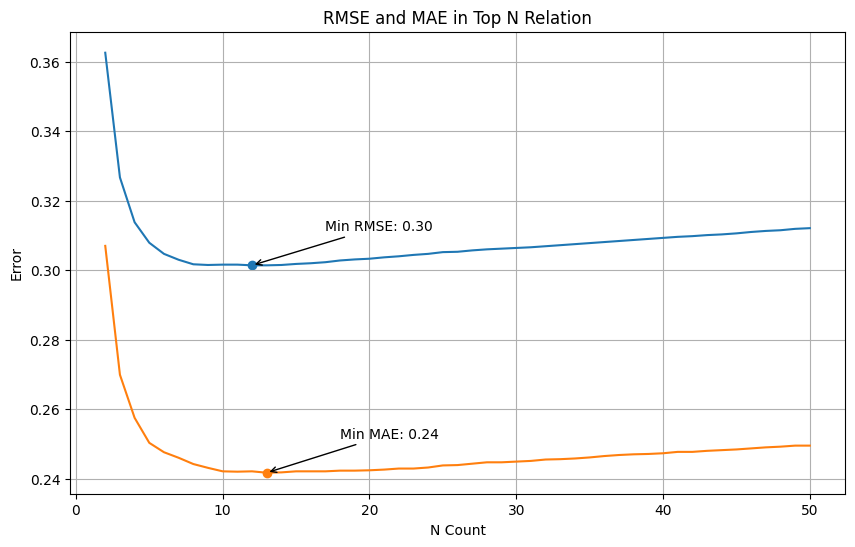

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sample_arr1, rmse_item_cs, label='RMSE')
plt.plot(sample_arr1, mae_item_cs, label='MAE')
plt.scatter(sample_arr1[min_rmse_index], rmse_item_cs[min_rmse_index], marker='o', label='Min RMSE')
plt.scatter(sample_arr1[min_mae_index], mae_item_cs[min_mae_index], marker='o', label='Min MAE')

plt.annotate(f'Min RMSE: {rmse_item_cs[min_rmse_index]:.2f}',
             xy=(sample_arr1[min_rmse_index], rmse_item_cs[min_rmse_index]),
             xytext=(sample_arr1[min_rmse_index] + 5, rmse_item_cs[min_rmse_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(f'Min MAE: {mae_item_cs[min_mae_index]:.2f}',
             xy=(sample_arr1[min_mae_index], mae_item_cs[min_mae_index]),
             xytext=(sample_arr1[min_mae_index] + 5, mae_item_cs[min_mae_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel('N Count')
plt.ylabel('Error')
plt.title('RMSE and MAE in Top N Relation')
plt.grid(True)
plt.show()

## ***PREDICT RATING***

In [ ]:
n = 9
df_pred_ib = df_transposed.copy()

# prediksi
for i in range(len(df_pred_ib)):
    # similarity
    for j in range(len(sim_item_cs)):
        # memeriksa apakah nilai sama dengan 0
        if (df_pred_ib[sim_item_cs.index[j]][i] == 0):

            numerator = 0
            denominator = 0

            tmp = top_n(n, sim_item_cs, sim_item_cs.index[j])
            for k in range(len(tmp)):
                if tmp.index[k] != sim_item_cs.index[j]:

                    numerator += ((item_based_df[tmp.index[k]][i]) * tmp.iloc[k])
                    denominator += tmp.iloc[k]

            if denominator != 0 :
                # update nilai prediksi
                df_pred_ib[sim_item_cs.index[j]][i] = average(df_transposed, sim_item_cs.index[j]) + (numerator/denominator)
df_pred_ib

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000000,0.485972,0.411954,0.189940,-0.365591,0.227996,0.400000,-0.587595,0.047996,0.129429,...,-0.405591,-0.397595,-0.635591,-0.357595,0.090000,-0.327595,0.280682,0.165992,0.375992,0.143988
bicaraboxoffice,0.000000,0.195313,-0.665591,-0.100802,-0.345591,0.291039,0.175637,-0.521563,0.347750,-0.255591,...,0.245651,-0.365591,0.229980,0.094910,0.105291,0.115490,0.290078,0.344214,0.200992,0.292094
WatchmenID,0.000000,-0.223587,0.317029,0.266221,0.459980,0.217327,0.299488,0.305992,0.411987,0.141900,...,0.455992,0.449980,0.259360,0.183261,0.165952,0.423252,0.316736,0.470973,-0.315591,0.197996
ErikDavis,0.000000,0.170000,0.290000,0.270000,-0.055070,0.260000,0.200000,0.345992,0.330000,0.160000,...,0.191388,-0.315591,0.290000,0.253928,0.214210,0.319619,0.270000,0.223988,0.210000,0.326618
arulfittron,-0.445591,0.228148,0.379782,0.339960,-0.289579,0.365719,-0.295591,0.356296,0.356549,-0.195591,...,0.168782,0.261655,0.341180,0.194441,0.280000,0.108474,0.378733,0.146101,0.313578,-0.543587
GilaFilmID,-0.361583,0.355486,0.275992,0.081323,-0.259539,0.245135,0.288463,-0.407595,0.163988,0.647996,...,-0.305591,-0.295591,0.317996,0.493988,0.281552,0.297794,-0.485431,0.197642,-0.167475,0.267956
TarizSolis,0.500000,-0.155591,0.400000,0.334580,0.347635,0.309879,0.232923,0.430000,-0.078697,0.285190,...,-0.273587,0.156177,0.387996,0.197556,0.396444,0.196226,-0.487595,0.442086,0.280217,0.317976
djaycoholyc,0.000000,0.687996,0.497996,-0.325591,-0.199479,0.337996,0.230195,0.453988,0.357996,-0.005471,...,0.386640,0.517976,0.450000,0.253860,0.357996,0.165690,0.380000,0.591159,0.307506,0.367996
akstanwyck,0.000000,0.170000,0.290000,0.270000,-0.233173,0.260000,0.238614,0.359438,0.330000,0.160000,...,0.347056,-0.243173,0.290000,0.261518,0.392479,0.521928,0.315062,0.290000,0.210000,0.367971
slashfilm,0.000000,0.170000,0.290000,0.270000,-0.223587,0.260000,0.200000,-0.265591,0.330000,0.160000,...,0.517936,0.557976,0.290000,0.170770,0.369088,0.575992,0.230300,0.335992,0.169360,0.380137


***SAVING DATAFRAME***

In [ ]:
df_pred_ib.to_excel("ResultCF_IB_DistilBERT.xlsx")

In [ ]:
files.download("ResultCF_IB_DistilBERT.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ***EVALUATION***

In [ ]:
df_actualib = df_transposed.copy()
df_predib = pd.read_excel("ResultCF_IB_DistilBERT.xlsx")
df_predib.rename(columns={'Unnamed: 0': 'nama film'}, inplace=True)

df_actual_values = df_actualib.to_numpy()
df_pred_values = df_predib.drop(columns='nama film').to_numpy()

y_actualib = df_actual_values.flatten()
y_predib = df_pred_values.flatten()

In [ ]:
MAE_ib = mean_absolute_error(y_actualib, y_predib)
MSE_ib = mean_squared_error(y_actualib, y_predib)
rmse_cbf_ib = math.sqrt(MSE_ib)

print("Mean Absolute Error (MAE):", MAE_ib)
print("Root Mean Square Error (RMSE):", rmse_cbf_ib)

Mean Absolute Error (MAE): 0.19687864604934244
Root Mean Square Error (RMSE): 0.24364276557170667
